<a href="https://colab.research.google.com/github/ibrta/examen_resolution/blob/main/Examen_1_Tarek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](https://drive.google.com/uc?export=view&id=1OZMTtcN1l-xVu8YXtU9qAUUHBs6ZmYzt)

### Import TensorFlow

In [1]:
import tensorflow as tf
import os
#tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'
print('Using TensorFlow version', tf.__version__)

## Importation de TensorFlow et os, configuration du niveau de journalisation pour afficher uniquement les erreurs, et affichage de la version TensorFlow installée.

Using TensorFlow version 2.15.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

## Importe le jeu de données MNIST depuis TensorFlow.keras et charge les données d'entraînement et de test dans les variables x_train, y_train, x_test, y_test.

11490434/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

## Affiche les formes (dimensions) des données d'entraînement et de test pour les images et les étiquettes du jeu de données MNIST.

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

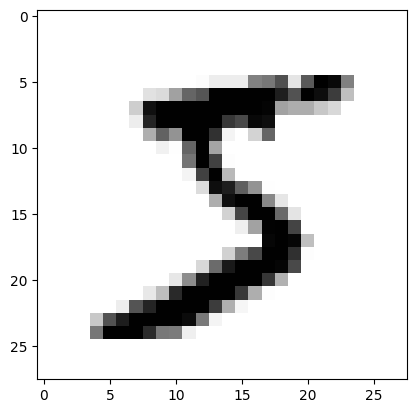

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()


## Importe la bibliothèque matplotlib.pyplot, configure l'affichage inline, puis affiche la première image du jeu d'entraînement MNIST en utilisant une carte de couleurs binaire.

### Display Labels

In [6]:
y_train[0]

## Affiche l'étiquette (label) pour la première image du jeu d'entraînement.

5

In [7]:
print(set(y_train))

## Affiche l'ensemble unique des étiquettes présentes dans les données d'entraînement y_train.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Encode les étiquettes y_train et y_test en représentation catégorique à l'aide de to_categorical de Keras.

### Validated Shapes

In [10]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

## Affiche les formes (dimensions) des données y_train_encoded et y_test_encoded après l'encodage catégorique.

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [11]:
y_train_encoded[0]

## Affiche le vecteur one-hot encodé pour la première image d'entraînement.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)



## Explique les équations linéaires et les réseaux de neurones, y compris les poids, les biais et les couches cachées, pour résoudre des problèmes de classification d'images.

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](https://drive.google.com/uc?export=view&id=1X53G3QBhSBZsCHchyvgOsRrczmh0IoXY)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](https://drive.google.com/uc?export=view&id=1usn-vb6FOIOkDuKOimQuFDgGwVSckG5W)

### Neural Networks

![Neural Network with 2 hidden layers](https://drive.google.com/uc?export=view&id=1-P9jSpGodu2fl-cvEXun3_zQytJDH5Yn)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [31]:
import numpy as np
x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

## Redimensionne les données d'images x_train et x_test en matrices 2D, affiche leurs nouvelles formes pour un traitement par réseau de neurones.

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [14]:
print(set(x_train_reshaped[0]))


## Affiche l'ensemble unique des valeurs de pixels pour la première image redimensionnée du jeu d'entraînement.
## Les 38 valeurs uniques représentent les différents niveaux de gris présents dans les pixels de la première image MNIST, allant des tons clairs aux blancs.

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [28]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped -x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped -x_mean)/ (x_std + epsilon)

## Calcule la moyenne et l'écart-type des données d'entraînement, normalise les données d'entraînement et de test en soustrayant la moyenne et divisant par l'écart-type.
## Epsilon est une petite constante ajoutée au dénominateur pour éviter les divisions par zéro lors de la normalisation, assurant ainsi la stabilité numérique.

### Display Normalized Pixel Values

In [21]:
print(set(x_train_norm[0]))

## Affiche l'ensemble unique des valeurs de pixels normalisées pour la première image d'entraînement.

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
## Crée un modèle séquentiel de réseau de neurones avec Keras, comprenant deux couches cachées de 128 neurones avec activation ReLU et une couche de sortie de 10 neurones avec softmax.
## ReLU (Rectified Linear Unit) est une fonction d'activation qui introduit de la non-linéarité. Softmax produit une distribution de probabilités sur les sorties pour la classification.

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](https://drive.google.com/uc?export=view&id=1QYbrKPd5_4Lz89q3faOn0ZE-JPbAljV4)

### Compiling the Model



SGD est l'algorithme qui met à jour les poids du réseau de neurones, tandis que categorical_crossentropy est la fonction qui évalue à quel point les prédictions du modèle diffèrent des vraies étiquettes, afin que SGD puisse ajuster les poids pour réduire cette erreur.



In [26]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics= ['accuracy']
)

model.summary()
## Compile le modèle avec l'optimiseur SGD, la fonction de perte categorical_crossentropy et la métrique accuracy. Affiche un résumé de l'architecture du modèle.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [44]:

model.fit(x_train_norm, y_train_encoded, batch_size=128, epochs=3)
## Ce code entraîne le modèle de réseau de neurones sur les données d'entraînement normalisées (x_train_norm) et les étiquettes one-hot encodées (y_train_encoded).
## Il utilise une taille de batch de 128 et effectue 3 époques d'entraînement.
## Pendant l'entraînement, le modèle ajuste ses poids pour minimiser la fonction de perte et améliorer ses performances de classification.

Epoch 1/3
469/469 [==============================] - 4s 8ms/step - loss: 0.0639 - accuracy: 0.9811
Epoch 2/3
469/469 [==============================] - 4s 8ms/step - loss: 0.0617 - accuracy: 0.9815
Epoch 3/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0597 - accuracy: 0.9822


### Evaluating the Model

In [46]:
loss, accuracy = model.evaluate(x_train_norm, y_train_encoded,
                              )
print('test set accuracy:', accuracy * 100)

# Ce code évalue les performances du modèle entraîné sur les données d'entraînement normalisées et encodées. Il calcule la perte et l'accuracy, puis affiche l'accuracy en pourcentage.

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9827
test set accuracy: 98.27333092689514


# Task 8: Predictions

### Predictions on Test Set

In [47]:
preds = model.predict(x_test_norm)
print('shape of preds:', preds.shape)

# Ce code effectue des prédictions sur les données de test normalisées (x_test_norm) à l'aide du modèle entraîné.
# Il stocke les prédictions dans la variable preds, puis affiche la forme(shape) du tenseur de prédictions.

313/313 [==============================] - 1s 2ms/step
shape of preds: (10000, 10)


### Plotting the Results

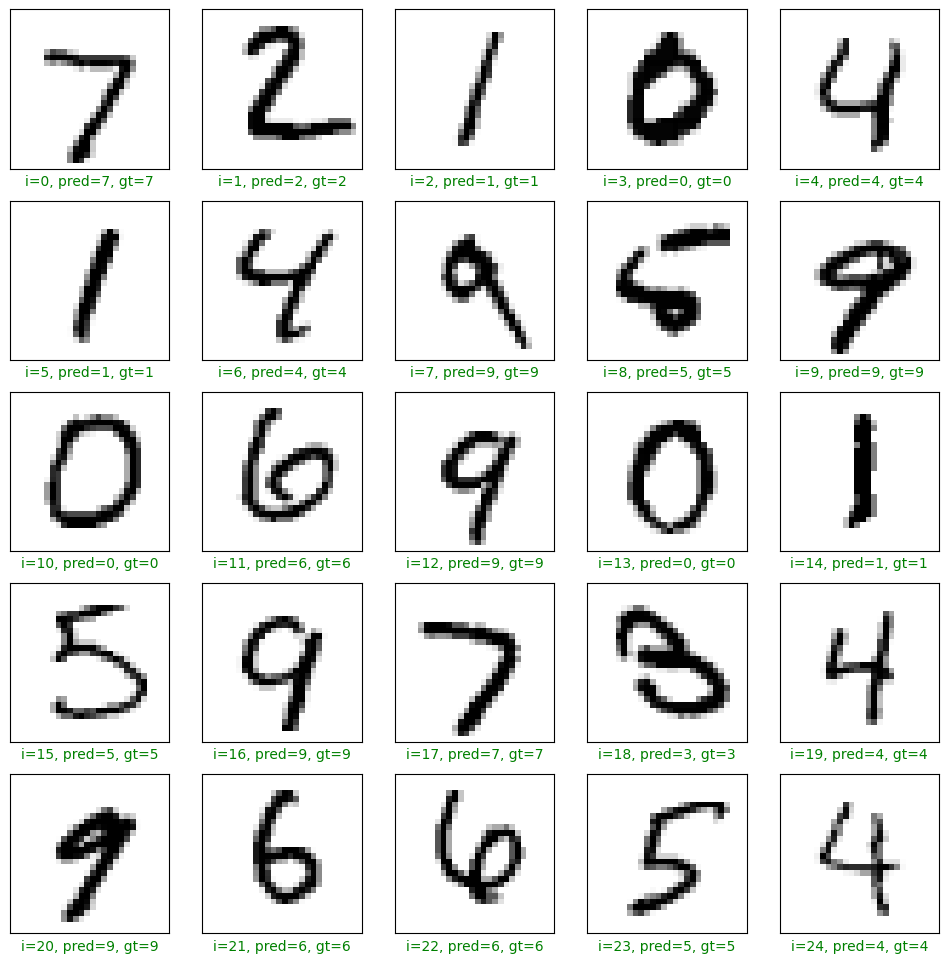

In [67]:
import matplotlib.pyplot as plt #import des librairies
import numpy as np

plt.figure(figsize=(12, 12)) # crée une figure 12 pouces par 12 pouces

start_index = 0 # défini l'index de départ pour les images

for i in range(25):    # boucle sur 25 images
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i]) #Obtient la prédiction et l'étiquette réelle
    gt = y_test[start_index+i]

    col = 'g' #Définit la couleur du texte en fonction de la prédiction
    if pred != gt:
        col = 'r'

    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col) #Ajoute un titre avec l'index, la prédiction et l'étiquette réelle
    plt.imshow(x_test[start_index+i], cmap='binary')

plt.show() # Affiche l'image en noir et blanc